- competition/dataset : [https://www.kaggle.com/c/zillow-prize-1](https://www.kaggle.com/c/zillow-prize-1)
- date : 2021/02/26
- original : [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize)

## Simple Exploration Notebook - Zillow Prize

**✏ 필사 1회** 

이 노트북에서는 Zillow 수상 대회에 주어진 데이터를 탐구해봅시다. 데이터를 깊이 조사하기 전에 이 대회에 대해 더 알아봅니다.  

**Zillow:**  
2016년 설립된 온라인 부동산 데이터베이스 회사  

**Zestimate:**  
각 속성에 대한 수백 개의 데이터 포인트들을 분석한 750만 개의 통계 및 머신러닝 모델을 기반으로 추정된 집값. 에러의 중간값 마진을 지속적으로 개선하고 있음 (처음 14%에서 오늘날 5%)  

**Objective:**  
Zestimate 잔차 오류를 개선하기 위한 모델 구축  

이 대회는 두 단계로 나뉘어 있습니다. public competition은 상금 50,000달러로 2018년 1월까지 지속됩니다. 이번 대회에서는 좀 다르기 때문에 prize details와 competition overview를 반드시 읽어보기 바랍니다.  

In [2]:
# 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import warnings
warnings.filterwarnings('ignore')

### Data Exploration

#### Train 2016 v2

In [3]:
# train file exploration
train_df = pd.read_csv('data/train_2016_v2.csv', parse_dates=['transactiondate'])
train_df.shape

(90275, 3)

💡 parse_dates 옵션: 날짜/시간 데이터를 날짜/시간 형태로 가져옴

In [4]:
train_df.head(3)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01


##### Logerror
이 대회의 타겟 변수는 'logerror' 필드입니다. 이 필드를 먼저 분석해봅시다.

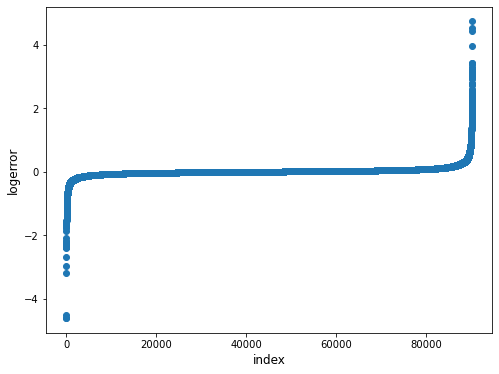

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df['logerror'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

끝 지점에 있는 몇 개의 이상치 빼고는 썩 괜찮습니다. 이상값을 제거하고 히스토그램으로 다시 작성해보겠습니다.

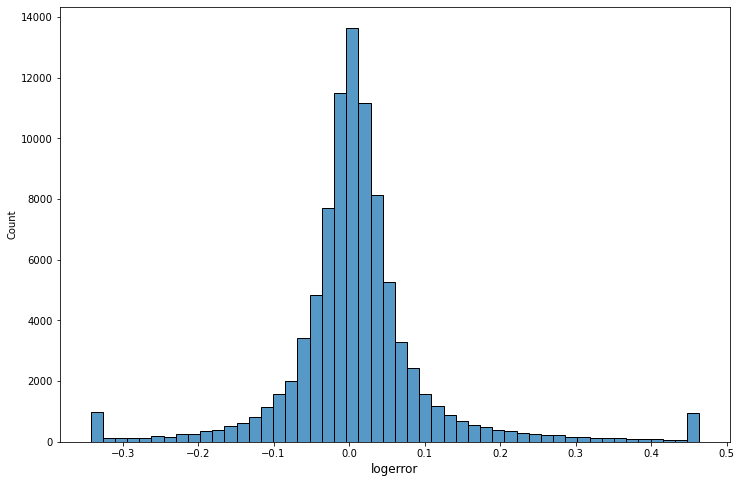

In [6]:
ulimit = np.percentile(train_df['logerror'].values, 99)
llimit = np.percentile(train_df['logerror'].values, 1)
train_df.loc[train_df['logerror'] > ulimit, 'logerror'] = ulimit
train_df.loc[train_df['logerror'] < llimit, 'logerror'] = llimit

plt.figure(figsize=(12, 8))
sns.histplot(train_df['logerror'].values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

logerror에 대한 정규분포가 근사합니다.  

##### Transaction Date
이제 데이터 필드를 살펴봅시다. 먼저 각 월별 거래 건수를 확인해보겠습니다.

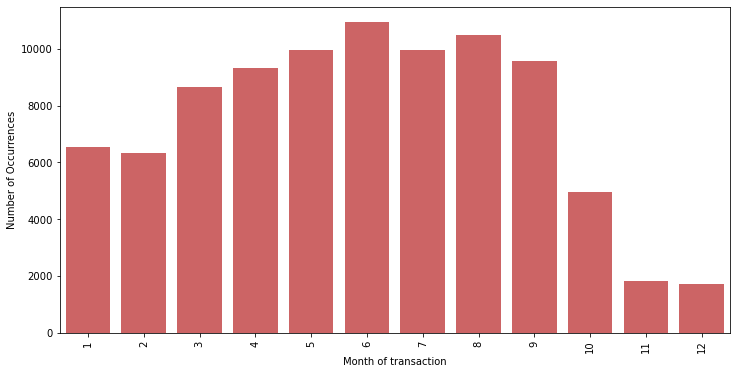

In [7]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month

cnt_srs = train_df['transaction_month'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction')
plt.ylabel('Number of Occurrences')
plt.show()

트레이닝 데이터의 대부분이 2016년 10월 15일 이전이고, 일부만이 2016년 10월 16일 이후에 존재합니다. 따라서 마지막 세 달의 bar가 비교적 짧습니다.

##### Parcel Id

In [8]:
train_df['parcelid'].value_counts().reset_index()['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

대부분의 parcel id들이 한 번씩만 등장합니다.

#### Properties 2016
이제 properties_2016 파일을 탐구해봅시다.

In [9]:
prop_df = pd.read_csv('data/properties_2016.csv')
prop_df.shape

(2985217, 58)

In [10]:
prop_df.head(3)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN


이 데이터셋에는 NaN 값들이 너무 많습니다. 그중 하나를 먼저 탐구해보겠습니다.

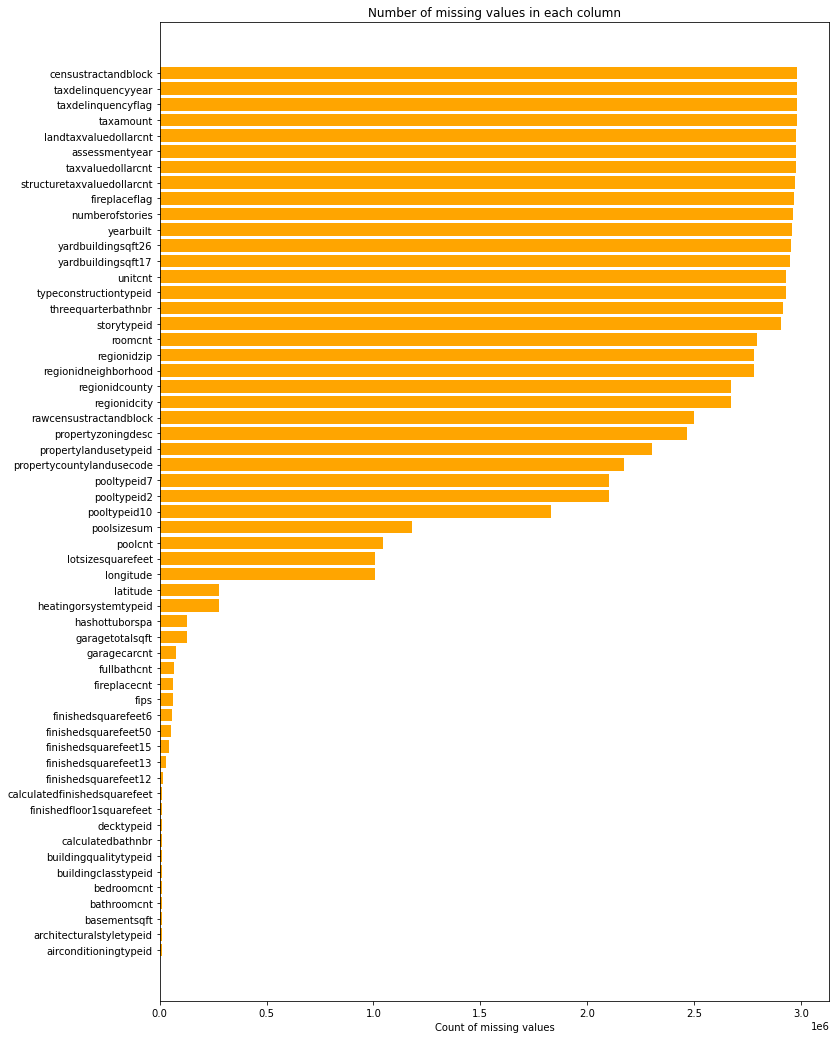

In [11]:
missing_df = prop_df.isnull().sum().reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count'] > 0]

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12, 18))
rects = ax.barh(ind, missing_df['missing_count'].sort_values(), color='orange')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df['column_name'].values, rotation='horizontal')
ax.set_xlabel('Count of missing values')
ax.set_title('Number of missing values in each column')
plt.show()

위도와 경도 변수를 살펴봅시다.

<Figure size 864x864 with 0 Axes>

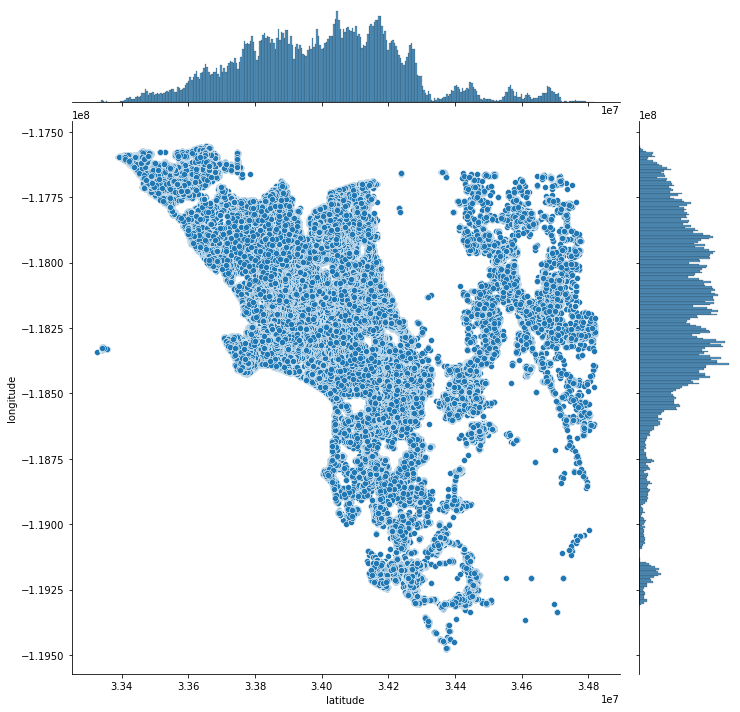

In [12]:
plt.figure(figsize=(12, 12))
sns.jointplot('latitude', 'longitude', data=prop_df, size=10)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.show()

이 데이터로부터 2016 세 국가(Los Angeles, Orange and Ventura, California)의 부동산 건물 전체 리스트를 확인할 수 있습니다.  

train 데이터에는 행이 90,811개였으나 properties 데이터에는 2,985,217개의 행이 있습니다. 따라서 두 파일을 병합한 뒤 분석해보겠습니다.

In [13]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head(3)

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13


변수들의 타입을 확인해보겠습니다.

In [14]:
pd.options.display.max_rows = 65

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ['Count', 'Column Type']
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


몇 개의 문자열 (categorical) 변수와 대부분의 float 변수로 이루어져 있습니다.

In [15]:
dtype_df.groupby('Column Type').count().reset_index()

,Column Type,Count
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


이제 새로 합쳐진 데이터 셋에서 결측치 수를 확인해보겠습니다.

In [16]:
missing_df = train_df.isnull().sum().reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df[missing_df['missing_ratio'] > 0.999]

,column_name,missing_count,missing_ratio
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
16,finishedsquarefeet13,90242,0.999634
44,storytypeid,90232,0.999524


네 개의 열의 결측값이 99.9%를 넘습니다.

##### Univariate Analysis
일변량 분석  

변수가 정말 많기 때문에 우선 float 변수만 취하여 타겟 변수와의 상관관계를 확인해보겠습니다.

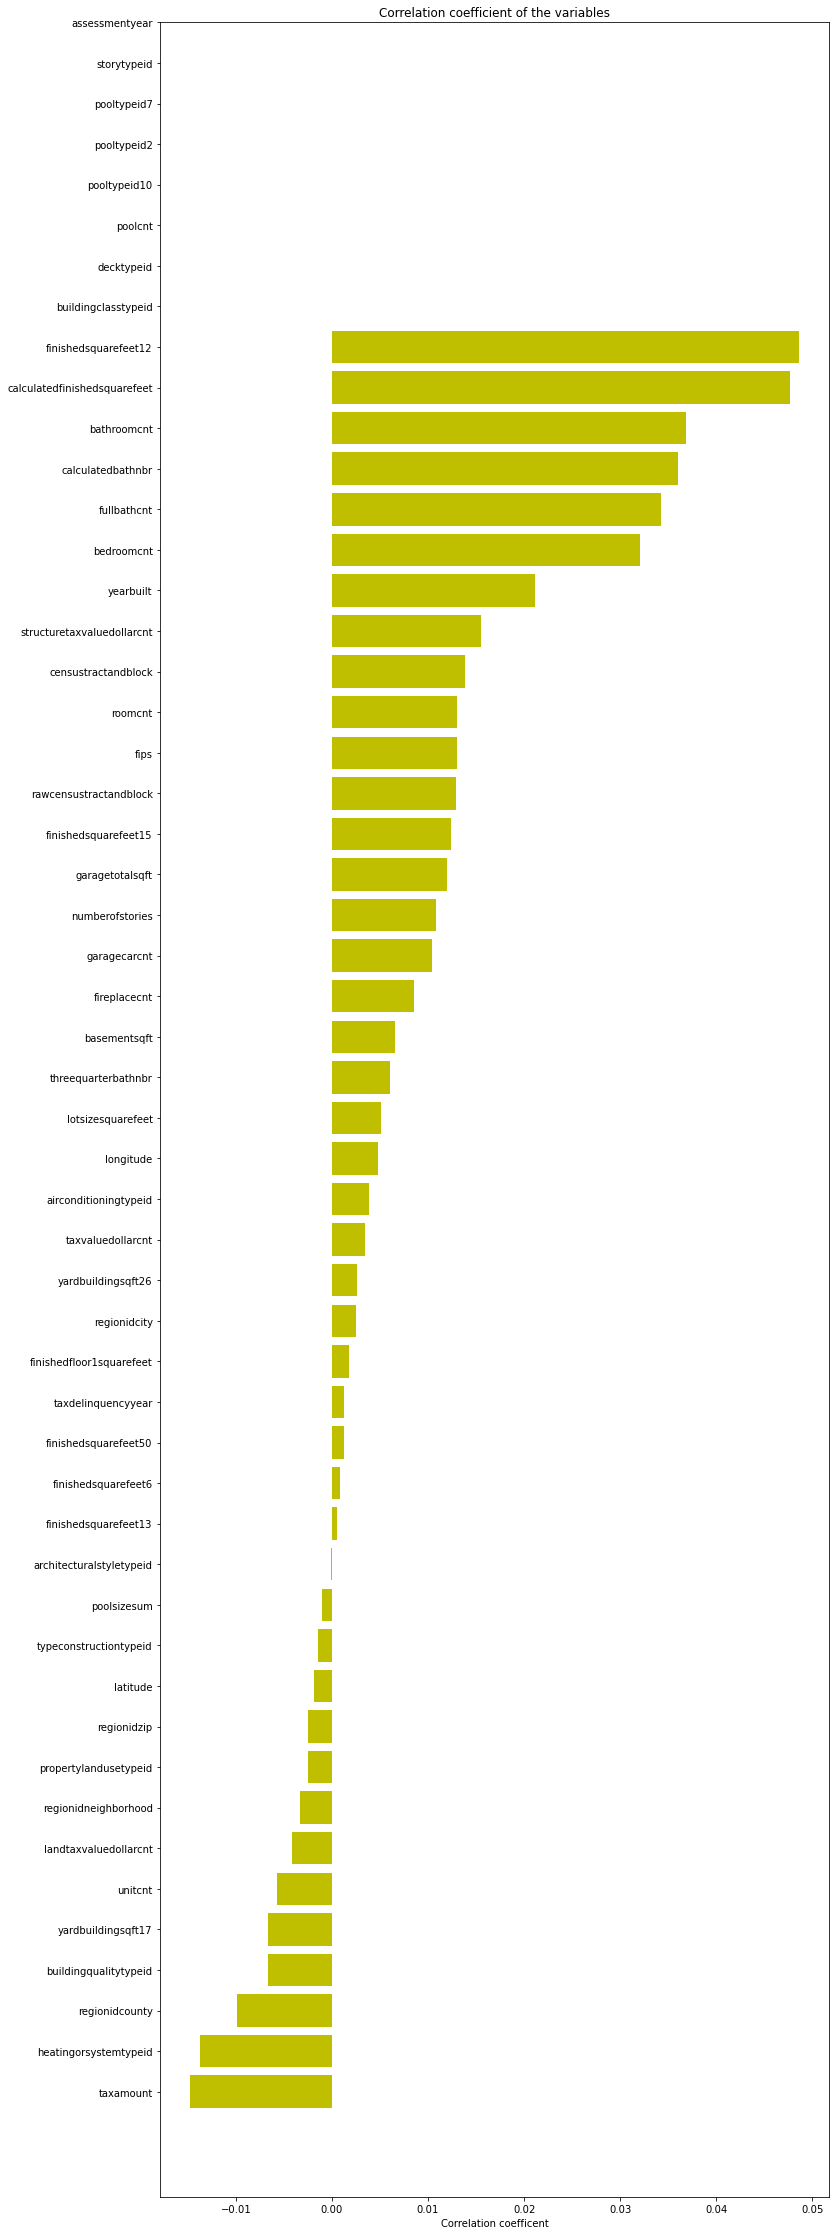

In [17]:
# 결측값에 평균값 입력
mean_values = train_df.mean()
train_df.fillna(mean_values, inplace=True)

# float 타입 변수 목록
x_cols = [col for col in train_df.columns if col != 'logerror' if train_df[col].dtype == 'float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df[col].values, train_df['logerror'].values)[0, 1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values('corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12, 40))
rects = ax.barh(ind, np.array(corr_df['corr_values'].values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df['col_labels'].values, rotation='horizontal')
ax.set_xlabel('Correlation coefficent')
ax.set_title('Correlation coefficient of the variables')
plt.show()

변수들과 타겟 변수와의 상관관계는 전반적으로 낮습니다.  

그래프 맨 위쪽 변수들은 아무런 상관계수를 갖지 않습니다. 이 변수들은 고유한 하나의 값만 가지기 때문이라고 추측합니다. 이 부분을 확실히 알아봅시다.

In [19]:
corr_zero_cols = [
    'assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7',
    'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid'
]
for col in corr_zero_cols:
    print(col, len(train_df[col].unique()))

assessmentyear 1
storytypeid 1
pooltypeid2 1
pooltypeid7 1
pooltypeid10 1
poolcnt 1
decktypeid 1
buildingclasstypeid 1


상관관계가 높은 편인 변수들에 대해 분석해봅시다.

In [20]:
corr_df_sel = corr_df[(corr_df['corr_values'] > 0.02)|(corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
49,taxamount,-0.014768
21,heatingorsystemtypeid,-0.013732
43,yearbuilt,0.021171
4,bedroomcnt,0.032035
18,fullbathcnt,0.034267
7,calculatedbathnbr,0.036019
3,bathroomcnt,0.036862
10,calculatedfinishedsquarefeet,0.047659
11,finishedsquarefeet12,0.048611


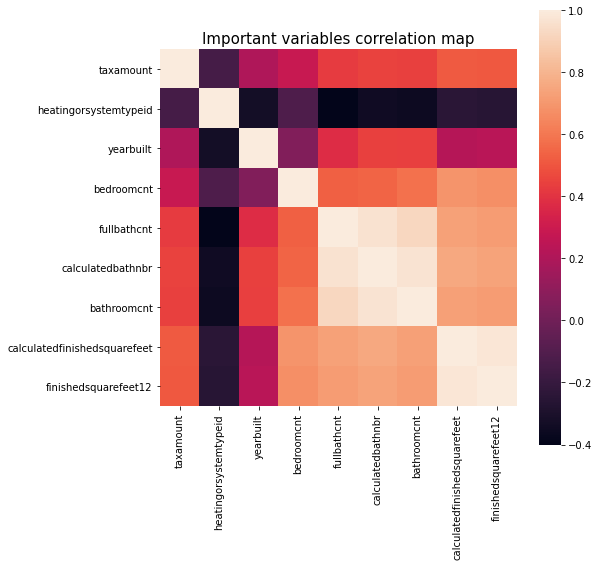

In [21]:
cols_to_use = corr_df_sel['col_labels'].tolist()

temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title('Important variables correlation map', fontsize=15)
plt.show()

중요 변수들 간의 상관관계가 너무 높습니다. 이 부분을 더 살펴보겠습니다.

##### Finished Square Feet 12
finished square feet 12와 log error 변수를 비교해봅시다.

<Figure size 864x864 with 0 Axes>

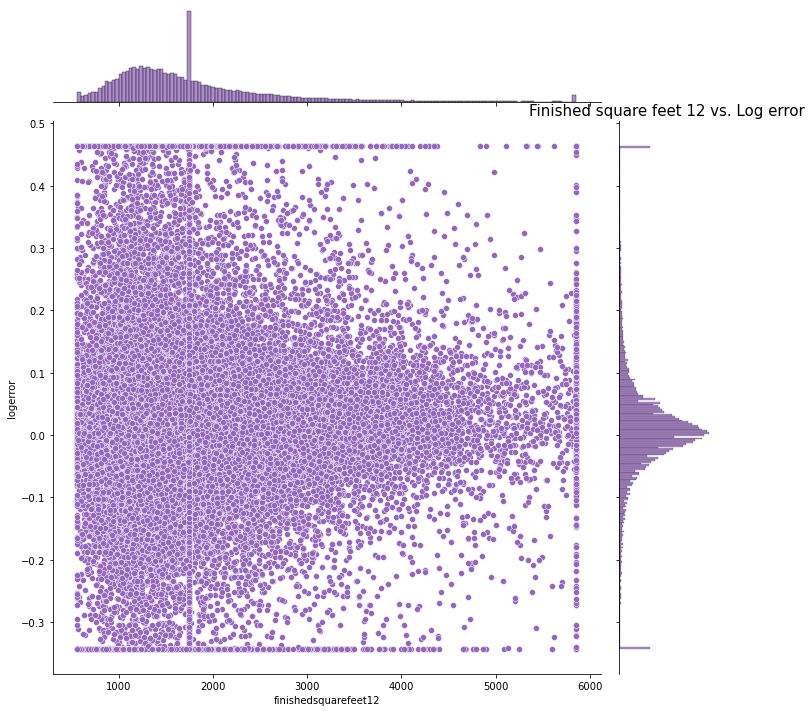

In [22]:
col = 'finishedsquarefeet12'
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df.loc[train_df[col] > ulimit, col] = ulimit
train_df.loc[train_df[col] < llimit, col] = llimit

plt.figure(figsize=(12, 12))
sns.jointplot(col, 'logerror', data=train_df, size=10, color=color[4])
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.ylabel('Log Error', fontsize=12)
plt.title('Finished square feet 12 vs. Log error', fontsize=15)
plt.show()

finished square feet 12 변수가 증가할수록 logerror의 오차 범위가 감소하는 것 같습니다. 아마 큰 집일수록 예측하기 쉽다는 의미일까요?

##### Calculated Finished Square Feet

<Figure size 864x864 with 0 Axes>

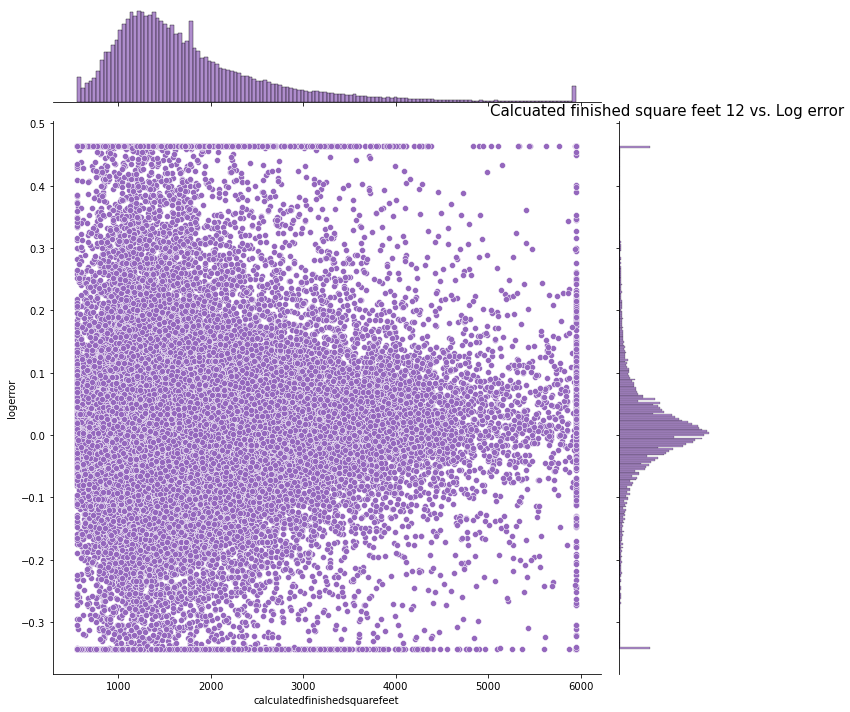

In [23]:
col = 'calculatedfinishedsquarefeet'
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df.loc[train_df[col] > ulimit, col] = ulimit
train_df.loc[train_df[col] < llimit, col] = llimit

plt.figure(figsize=(12, 12))
sns.jointplot(col, 'logerror', data=train_df, size=10, color=color[4])
plt.xlabel('Calculated Finished Square Feet 12', fontsize=12)
plt.ylabel('Log Error', fontsize=12)
plt.title('Calcuated finished square feet 12 vs. Log error', fontsize=15)
plt.show()

위 그래프와 이전 그래프의 분포가 비슷합니다. 두 변수 사이의 상관관계가 높은 것 또한 당연합니다.

##### Bathroom Count

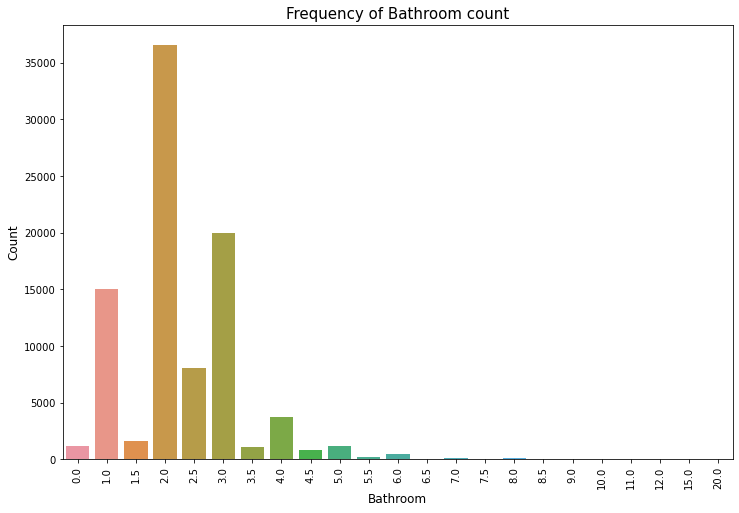

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(train_df['bathroomcnt'])
plt.xticks(rotation='vertical')
plt.xlabel('Bathroom', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Frequency of Bathroom count', fontsize=15)
plt.show()

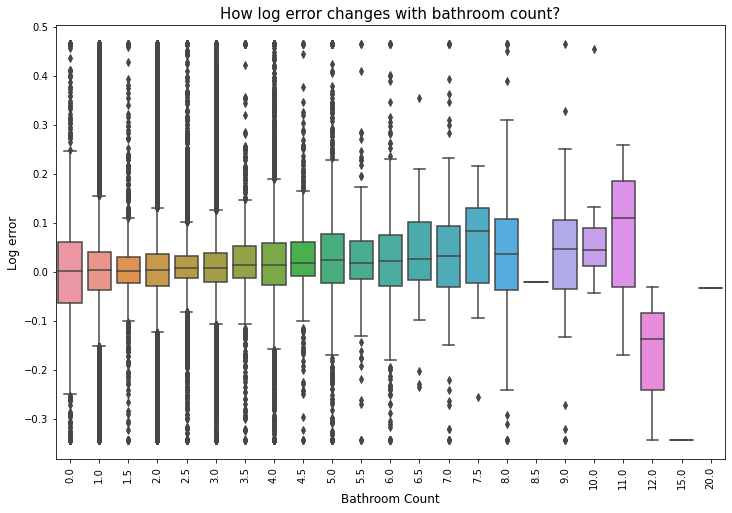

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot('bathroomcnt', 'logerror', data=train_df)
plt.xticks(rotation='vertical')
plt.xlabel('Bathroom Count', fontsize=12)
plt.ylabel('Log error', fontsize=12)
plt.title('How log error changes with bathroom count?', fontsize=15)
plt.show()

##### Bedroom Count

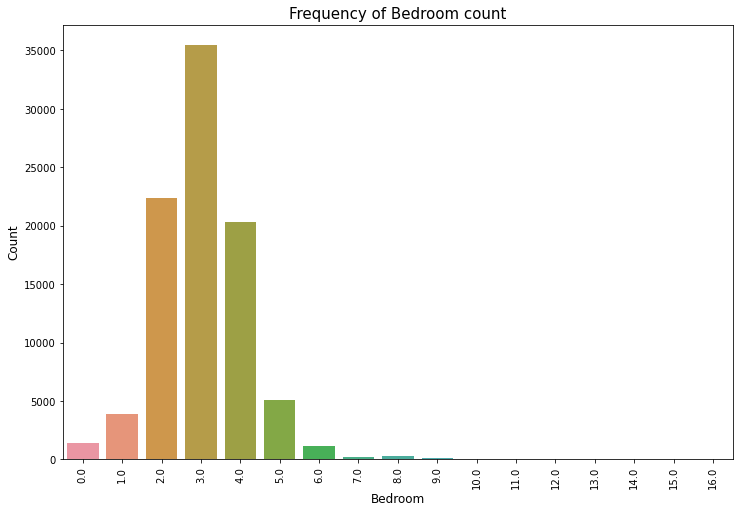

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(train_df['bedroomcnt'])
plt.xticks(rotation='vertical')
plt.xlabel('Bedroom', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Frequency of Bedroom count', fontsize=15)
plt.show()

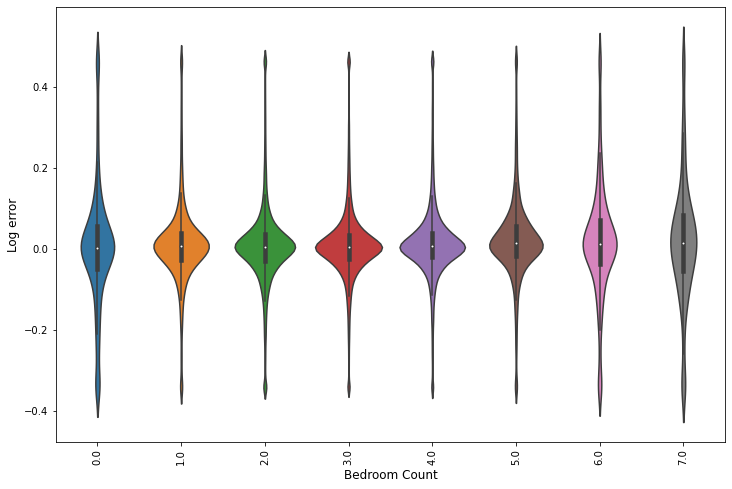

In [27]:
train_df.loc[train_df['bedroomcnt'] > 7, 'bedroomcnt'] = 7
plt.figure(figsize=(12, 8))
sns.violinplot('bedroomcnt', 'logerror', data=train_df)
plt.xticks(rotation='vertical')
plt.xlabel('Bedroom Count', fontsize=12)
plt.ylabel('Log error', fontsize=12)
plt.show()

##### Tax Amount

<Figure size 864x864 with 0 Axes>

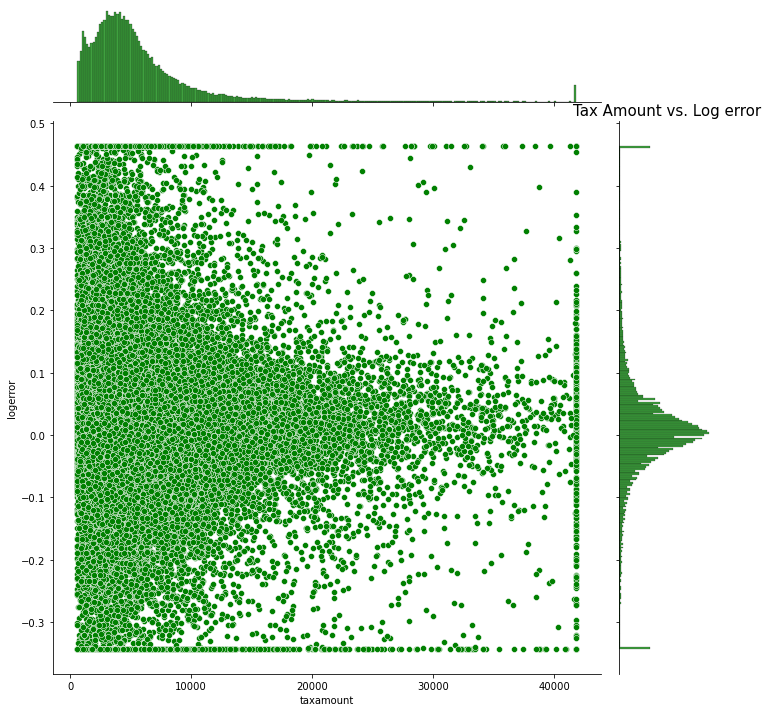

In [28]:
col = 'taxamount'
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df.loc[train_df[col] > ulimit, col] = ulimit
train_df.loc[train_df[col] < llimit, col] = llimit

plt.figure(figsize=(12, 12))
sns.jointplot(col, 'logerror', data=train_df, size=10, color='g')
plt.xlabel('Tax Amount', fontsize=12)
plt.ylabel('Log Error', fontsize=12)
plt.title('Tax Amount vs. Log error', fontsize=15)
plt.show()

##### Year Built

**❗ ggplot import 시 오류**  
`C:\Users\user\Anaconda3\Lib\site-packages\ggplot\utils.py`에서  
From:  
```python
date_types = (
    pd.tslib.Timestamp,
    pd.DatetimeIndex,
    pd.Period,
    pd.PeriodIndex,
    datetime.datetime,
    datetime.time
)
```
To:  
```python
date_types = (
    pd._tslib.Timestamp,
    pd.DatetimeIndex,
    pd.Period,
    pd.PeriodIndex,
    datetime.datetime,
    datetime.time
)
```

`C:\Users\user\Anaconda3\Lib\site-packages\ggplot\stats\smoothers.py`에서  
From:  
```python
from pandas.lib import Timestamp

date_types = (
    pd.tslib.Timestamp,
    pd.DatetimeIndex,
    pd.Period,
    pd.PeriodIndex,
    datetime.datetime,
    datetime.time
)
```
To:  
```python
from pandas import Timestamp

date_types = (
    pd.Timestamp,
    pd.DatetimeIndex,
    pd.Period,
    pd.PeriodIndex,
    datetime.datetime,
    datetime.time
)
```

`C:\Users\user\Anaconda3\Lib\site-packages\ggplot\stats\stat_smooth.py`에서  
From:  
```python
smoothed_data = smoothed_data.sort('x')
```
To:  
```python
try:  # change in Pandas-0.19
    smoothed_data = smoothed_data.sort_values(by='x')
except:  # before Pandas-0.19
    smoothed_data = smoothed_data.sort('x')
```

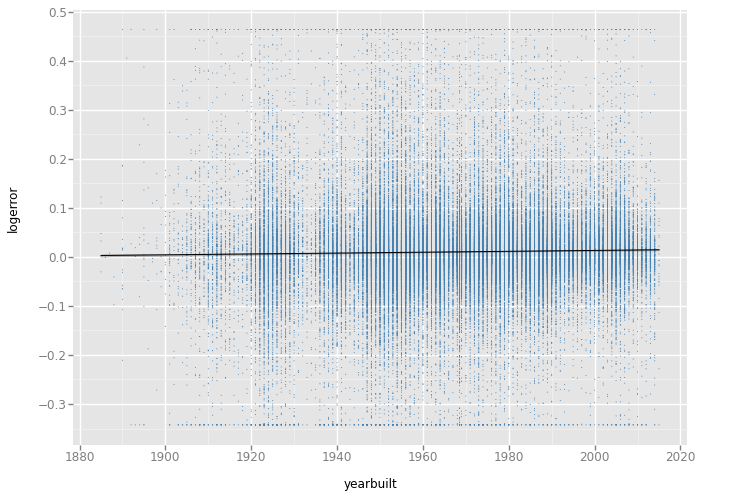

<ggplot: (150752644340)>

In [29]:
from ggplot import *
ggplot(aes(x='yearbuilt', y='logerror'), data=train_df) +\
geom_point(color='steelblue', size=1) +\
stat_smooth()

건설된 연도와 관련하여 소폭의 증가 추세를 보입니다.  

이제 위도와 경도에 따라 log error가 어떻게 변하는지 알아봅시다.

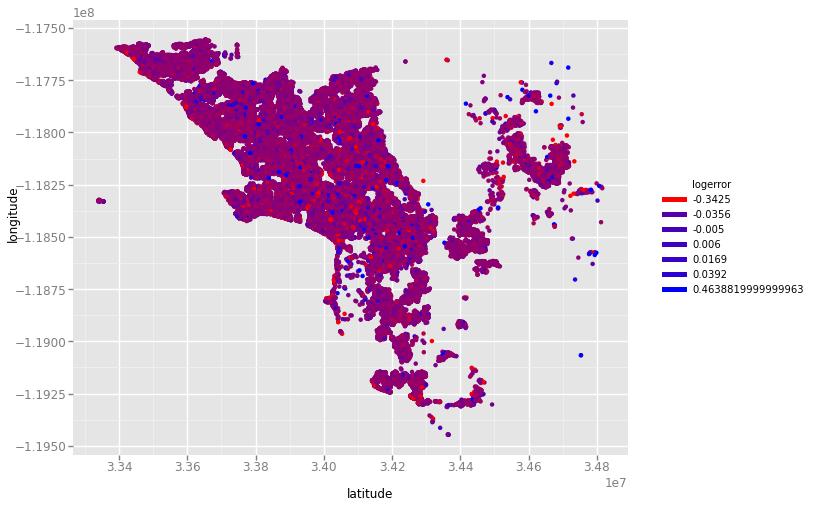

<ggplot: (150885628245)>

In [30]:
ggplot(aes(x='latitude', y='longitude', color='logerror'), data=train_df) +\
geom_point() +\
scale_color_gradient(low='red', high='blue')

맨눈으로는 위도나 경도와 관련하여 눈에 보이는 특징이 없습니다.  

이번에는 양의 상관관계가 가장 큰 변수와 음의 상관관계가 가장 큰 변수에서 패턴을 발견할 수 있을지 살펴봅시다.

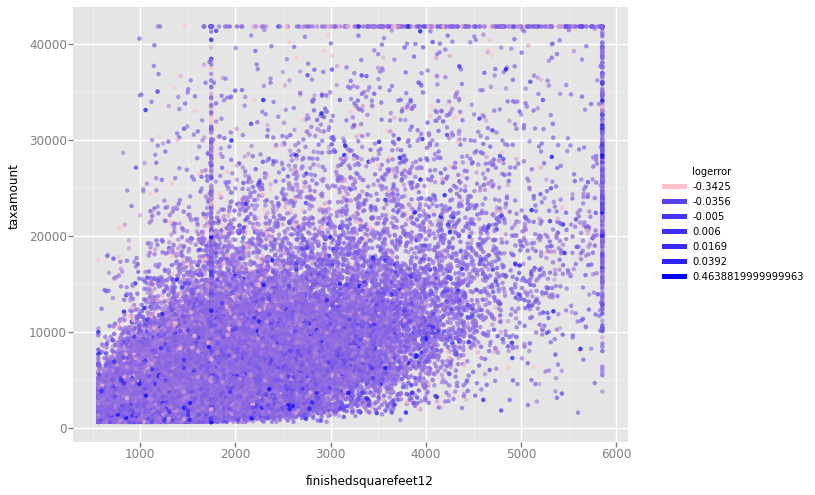

<ggplot: (150851350589)>

In [31]:
ggplot(aes(x='finishedsquarefeet12', y='taxamount', color='logerror'), data=train_df)+\
geom_point(alpha=0.7)+\
scale_color_gradient(low='pink', high='blue')

Put a bird on it!


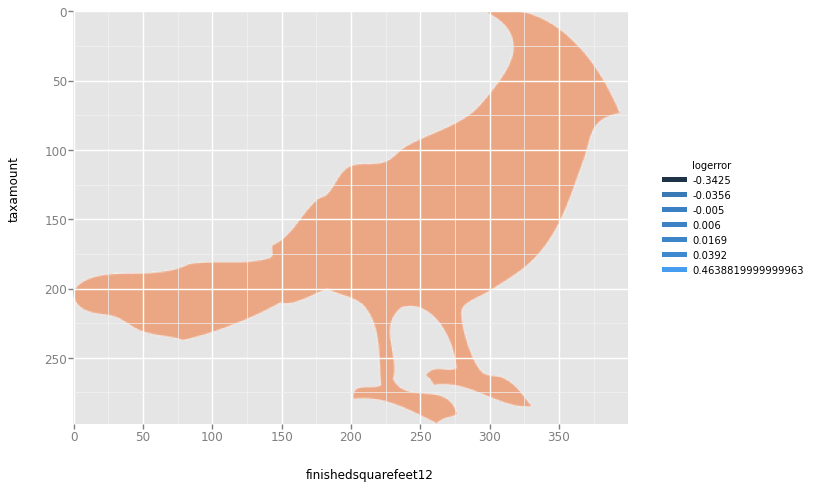

<ggplot: (150851350670)>

In [32]:
ggplot(aes(x='finishedsquarefeet12', y='taxamount', color='logerror'), data=train_df)+\
geom_now_its_art()

### Modeling

데이터에 대한 몇 가지 패턴을 알아보았습니다.  

우리는 일변량 분석에서 중요한 변수를 이해했습니다. 그러나 이것은 독립적인 기준이며 선형이라는 가정을 가지고 있습니다. 이제 extra tree 모델을 구축함으로써 중요 변수를 얻을 수 있는 비선형 모델을 만들겠습니다.

In [33]:
train_y = train_df['logerror'].values
cat_cols = [
    "hashottuborspa", "propertycountylandusecode", "propertyzoningdesc",
    "fireplaceflag", "taxdelinquencyflag"
]
train_df.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month'] + cat_cols, axis=1, inplace=True)
feat_names = train_df.columns.values


In [38]:
# Extra Tree
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(
    n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0
)
model.fit(train_df, train_y)

ExtraTreesRegressor(max_depth=30, max_features=0.3, n_estimators=25, n_jobs=-1,
                    random_state=0)

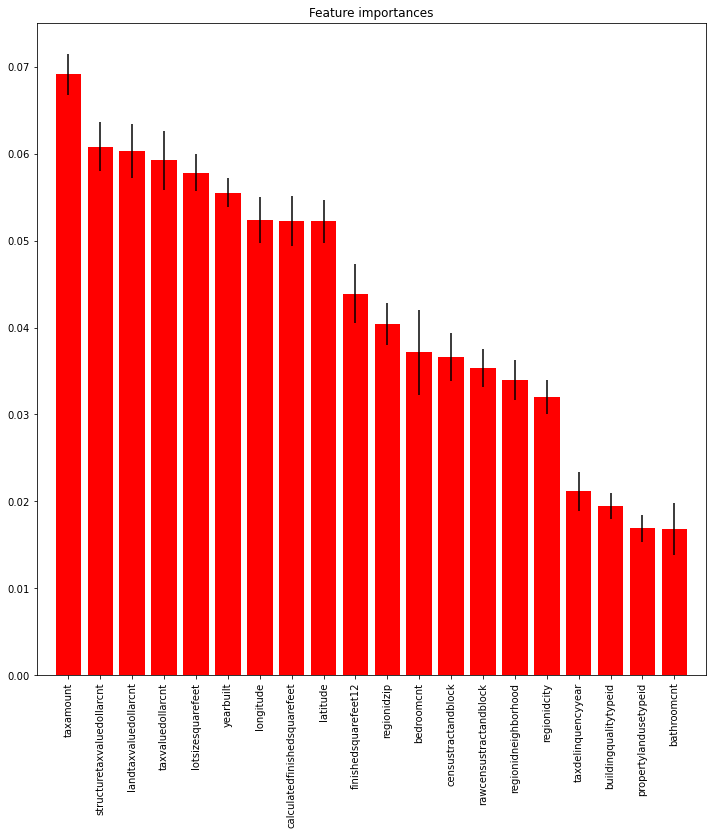

In [35]:
# 변수 중요도 시각화
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12, 12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

tax amount가 가장 중요도가 높으며 그 다음은 structure tax value dollar cnt와 land tax value dollar cnt입니다.

In [36]:
# XGBoost
import xgboost as xgb
xgb_params = {
    'eta':0.05,
    'max_depth':8,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'objective':'reg:linear',
    'silent':1,
    'seed':0
}
dtrain = xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

[14:30:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:30:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




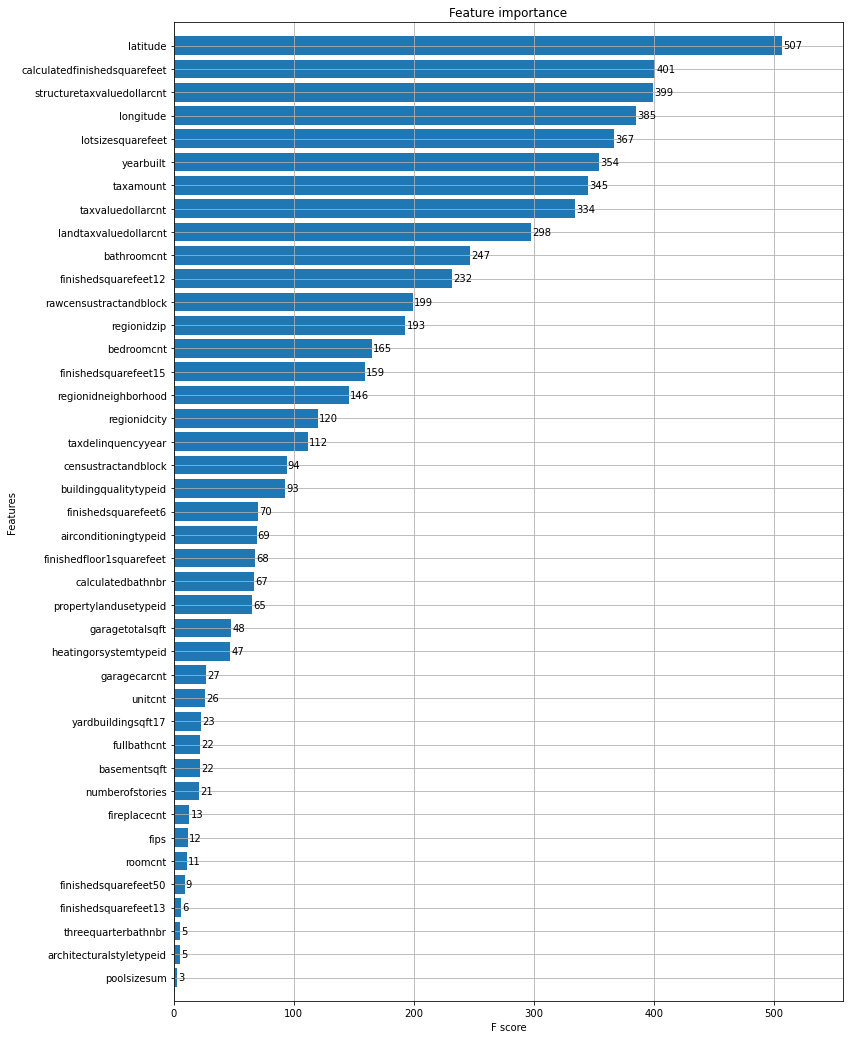

In [37]:
# 변수 중요도 시각화
fig, ax = plt.subplots(figsize=(12, 18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

xgboost에서 가장 중요한 변수들은 latitude, calculated finished square feet, structure tax value dolar cnt입니다.